<a href="https://colab.research.google.com/github/rahuldevkar5/Data_Science/blob/main/Random_Forests_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
company=pd.read_csv('/content/Company_Data.csv')
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company.drop(columns=['CompPrice','Income','Price','Age','Education'],inplace=True)

In [5]:
#creating new column
company['Sale']=pd.cut(company["Sales"], bins = [2,9,15], labels = ["No", "Yes"])
company

,Sales,Advertising,Population,ShelveLoc,Urban,US,Sale
0,9.50,11,276,Bad,Yes,Yes,Yes
1,11.22,16,260,Good,Yes,Yes,Yes
2,10.06,10,269,Medium,Yes,Yes,Yes
3,7.40,4,466,Medium,Yes,Yes,No
4,4.15,3,340,Bad,Yes,No,No
...,...,...,...,...,...,...,...
395,12.57,17,203,Good,Yes,Yes,Yes
396,6.14,3,37,Medium,No,Yes,No
397,7.41,12,368,Medium,Yes,Yes,No
398,5.94,7,284,Bad,Yes,Yes,No


In [6]:
company=pd.get_dummies(company)
company

,Sales,Advertising,Population,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sale_No,Sale_Yes
0,9.50,11,276,1,0,0,0,1,0,1,0,1
1,11.22,16,260,0,1,0,0,1,0,1,0,1
2,10.06,10,269,0,0,1,0,1,0,1,0,1
3,7.40,4,466,0,0,1,0,1,0,1,1,0
4,4.15,3,340,1,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,17,203,0,1,0,0,1,0,1,0,1
396,6.14,3,37,0,0,1,1,0,0,1,1,0
397,7.41,12,368,0,0,1,0,1,0,1,1,0
398,5.94,7,284,1,0,0,0,1,0,1,1,0


In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(company.iloc[:,0:12])

array([[ 0.71037626,  0.65717702,  0.07581929, ...,  0.74188112,
        -1.52752523,  1.61356859],
       [ 1.32017934,  1.40995711, -0.0328822 , ...,  0.74188112,
        -1.52752523,  1.61356859],
       [ 0.9089168 ,  0.506621  ,  0.02826239, ...,  0.74188112,
        -1.52752523,  1.61356859],
       ...,
       [-0.03060538,  0.80773304,  0.70085283, ...,  0.74188112,
         0.65465367, -0.61974434],
       [-0.55177428,  0.05495295,  0.13017003, ...,  0.74188112,
         0.65465367, -0.61974434],
       [ 0.78482897, -0.99893918, -1.61584759, ...,  0.74188112,
        -1.52752523,  1.61356859]])

In [8]:
company['Sales'] = company['Sales'].astype('category')

In [9]:
x=company.iloc[:,0:10]
y=company.iloc[:,10:12]

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [11]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [12]:
# Train the model on training data
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [13]:
y_pred=rf.predict(x_test)

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
results = cross_val_score(rf, x, y)
results.mean()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

0.9634907258795845

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, 
                            max_depth=3,
                            max_features='auto', 
                            min_samples_leaf=4,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=0)
rf.fit(x, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

[Text(418.5, 475.65000000000003, '4.15 <= 0.5\ngini = 0.417\nsamples = 250\nvalue = [[124, 276]\n[287, 113]]'),
 Text(251.10000000000002, 339.75, '9.5 <= 9.04\ngini = 0.336\nsamples = 199\nvalue = [[74, 248]\n[258, 64]]'),
 Text(167.4, 203.85000000000002, '11.22 <= 7.5\ngini = 0.037\nsamples = 159\nvalue = [[10, 248]\n[258, 0]]'),
 Text(83.7, 67.94999999999999, 'gini = 0.054\nsamples = 107\nvalue = [[10, 165]\n[175, 0]]'),
 Text(251.10000000000002, 67.94999999999999, 'gini = 0.0\nsamples = 52\nvalue = [[0, 83]\n[83, 0]]'),
 Text(334.8, 203.85000000000002, 'gini = 0.0\nsamples = 40\nvalue = [[64, 0]\n[0, 64]]'),
 Text(585.9, 339.75, '9.5 <= 8.99\ngini = 0.464\nsamples = 51\nvalue = [[50, 28]\n[29, 49]]'),
 Text(502.20000000000005, 203.85000000000002, 'gini = 0.0\nsamples = 18\nvalue = [[0, 28]\n[28, 0]]'),
 Text(669.6, 203.85000000000002, '6.63 <= 0.5\ngini = 0.02\nsamples = 33\nvalue = [[50, 0]\n[1, 49]]'),
 Text(585.9, 67.94999999999999, 'gini = 0.029\nsamples = 21\nvalue = [[34, 0]\n

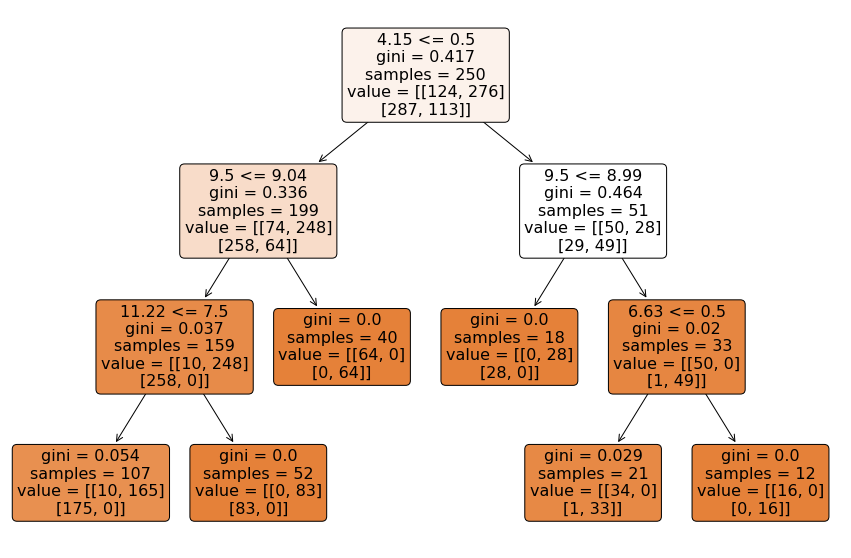

In [28]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(rf.estimators_[0], 
          sales=company.Sales,
          population=company.Population, 
          filled=True, impurity=True, 
          rounded=True)